In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy.random import randn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import time

In [2]:
cd /kaggle/input/predicting-the-sales-of-products-of-a-retail-chain

/kaggle/input/predicting-the-sales-of-products-of-a-retail-chain


In [3]:
sales_data = pd.read_csv("train_data.csv")

In [4]:
sales_data.head() 

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [5]:
product_price = pd.read_csv("product_prices.csv")


In [6]:
product_price.head()

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94


In [7]:
date_to_week=pd.read_csv("date_to_week_id_map.csv")

In [8]:
date_to_week.head()

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


In [9]:
print(sales_data.shape) 
print(product_price.shape) 
print(date_to_week.shape)

(395000, 7)
(59000, 4)
(821, 2)


In [10]:
prod_date=pd.merge(product_price,date_to_week, on=['week_id'], how='inner') 


In [11]:
prod_date.head()

,outlet,product_identifier,week_id,sell_price,date
0,111,74,49,2.94,2012-01-01
1,111,74,49,2.94,2012-01-02
2,111,74,49,2.94,2012-01-03
3,111,74,49,2.94,2012-01-04
4,111,74,49,2.94,2012-01-05


In [12]:
train_dataset=pd.merge(sales_data,prod_date, on=['date','product_identifier','outlet'], how='inner')
train_dataset.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88


In [13]:
train_dataset.shape

(395000, 9)

In [14]:
train_dataset.isnull().sum()

date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
week_id                  0
sell_price               0
dtype: int64

In [15]:
train_dataset.dtypes

date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
week_id                    int64
sell_price               float64
dtype: object

In [16]:
train_dataset.describe()

,product_identifier,department_identifier,outlet,sales,week_id,sell_price
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,105.070886,4.987644
std,809.799518,6.337863,91.161291,3.595266,32.578749,3.874444
min,74.000000,11.000000,111.000000,0.000000,49.000000,0.050000
25%,926.000000,21.000000,113.000000,0.000000,77.000000,2.680000
50%,1325.000000,22.000000,221.500000,0.000000,105.000000,3.980000
75%,1753.000000,31.000000,331.000000,1.000000,133.000000,6.480000
max,3021.000000,33.000000,333.000000,293.000000,161.000000,44.360000


In [17]:
train_dataset_1 = train_dataset.copy()

In [18]:
train_dataset_1.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88


In [19]:
train_dataset_1 = pd.get_dummies(train_dataset_1, columns =['category_of_product','state'])

In [20]:
train_dataset_1.head()

,date,product_identifier,department_identifier,outlet,sales,week_id,sell_price,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Kerala,state_Maharashtra,state_Telangana
0,2012-01-01,74,11,111,0,49,2.94,0,0,1,0,1,0
1,2012-01-01,337,11,111,1,49,7.44,0,0,1,0,1,0
2,2012-01-01,423,12,111,0,49,0.97,0,0,1,0,1,0
3,2012-01-01,432,12,111,0,49,4.97,0,0,1,0,1,0
4,2012-01-01,581,21,111,0,49,4.88,0,1,0,0,1,0


In [21]:
train_dataset_1.dtypes

date                                               object
product_identifier                                  int64
department_identifier                               int64
outlet                                              int64
sales                                               int64
week_id                                             int64
sell_price                                        float64
category_of_product_drinks_and_food                 uint8
category_of_product_fast_moving_consumer_goods      uint8
category_of_product_others                          uint8
state_Kerala                                        uint8
state_Maharashtra                                   uint8
state_Telangana                                     uint8
dtype: object

In [22]:
train_dataset_1['Month'] = pd.to_datetime(train_dataset_1['date']).dt.month


In [23]:
train_dataset_1.head()

,date,product_identifier,department_identifier,outlet,sales,week_id,sell_price,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Kerala,state_Maharashtra,state_Telangana,Month
0,2012-01-01,74,11,111,0,49,2.94,0,0,1,0,1,0,1
1,2012-01-01,337,11,111,1,49,7.44,0,0,1,0,1,0,1
2,2012-01-01,423,12,111,0,49,0.97,0,0,1,0,1,0,1
3,2012-01-01,432,12,111,0,49,4.97,0,0,1,0,1,0,1
4,2012-01-01,581,21,111,0,49,4.88,0,1,0,0,1,0,1


In [24]:
train_dataset_1 = train_dataset_1.drop(columns=["date","week_id"])


In [25]:
train_dataset_1

,product_identifier,department_identifier,outlet,sales,sell_price,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Kerala,state_Maharashtra,state_Telangana,Month
0,74,11,111,0,2.94,0,0,1,0,1,0,1
1,337,11,111,1,7.44,0,0,1,0,1,0,1
2,423,12,111,0,0.97,0,0,1,0,1,0,1
3,432,12,111,0,4.97,0,0,1,0,1,0,1
4,581,21,111,0,4.88,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
394995,2932,33,333,2,2.78,1,0,0,1,0,0,2
394996,2935,33,333,8,0.20,1,0,0,1,0,0,2
394997,3004,33,333,0,2.50,1,0,0,1,0,0,2
394998,3008,33,333,0,1.98,1,0,0,1,0,0,2


In [26]:
train_dataset_1['sales'].unique()

array([  0,   1,   3,   2,   9,   5,   8,  18,  12,  28,   4,   6,  27,
         7,  10,  47,  13,  11,  32,  23,  14,  16,  19,  33,  17,  26,
        20,  87,  35,  54,  22,  15,  36,  31,  21,  25,  34,  43,  53,
        38,  30,  85,  57, 100,  52,  24,  29,  58,  63,  37,  42,  45,
        39,  72,  40,  80,  98,  56,  70,  50,  86,  46,  51,  66,  41,
        64,  81,  79,  82,  69,  48,  94,  44,  60,  68,  49,  77,  61,
        76, 119,  92,  93,  62, 124,  59,  74,  73, 174,  96,  71, 132,
       101,  55,  78,  75,  65, 105, 120, 150, 173,  67,  83,  95, 170,
       116,  90, 108, 139,  84, 293,  88, 241, 102,  97, 156, 114, 126,
       109, 118, 111,  99, 171, 242, 121, 215,  89])

In [27]:
train_dataset_1['outlet'].unique()

array([111, 112, 113, 114, 221, 222, 223, 331, 332, 333])

In [28]:
train_dataset_1.shape

(395000, 12)

In [29]:
train_dataset_1.isnull().sum()

product_identifier                                0
department_identifier                             0
outlet                                            0
sales                                             0
sell_price                                        0
category_of_product_drinks_and_food               0
category_of_product_fast_moving_consumer_goods    0
category_of_product_others                        0
state_Kerala                                      0
state_Maharashtra                                 0
state_Telangana                                   0
Month                                             0
dtype: int64

In [30]:
train_dataset_1.dtypes

product_identifier                                  int64
department_identifier                               int64
outlet                                              int64
sales                                               int64
sell_price                                        float64
category_of_product_drinks_and_food                 uint8
category_of_product_fast_moving_consumer_goods      uint8
category_of_product_others                          uint8
state_Kerala                                        uint8
state_Maharashtra                                   uint8
state_Telangana                                     uint8
Month                                               int64
dtype: object

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import r2_score

In [32]:
train_dataset_1 = train_dataset_1.drop(['sales'],axis=1)

In [33]:
train_dataset_1.head()

,product_identifier,department_identifier,outlet,sell_price,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Kerala,state_Maharashtra,state_Telangana,Month
0,74,11,111,2.94,0,0,1,0,1,0,1
1,337,11,111,7.44,0,0,1,0,1,0,1
2,423,12,111,0.97,0,0,1,0,1,0,1
3,432,12,111,4.97,0,0,1,0,1,0,1
4,581,21,111,4.88,0,1,0,0,1,0,1


In [34]:
y = train_dataset.sales

In [35]:
y

0         0
1         1
2         0
3         0
4         0
         ..
394995    2
394996    8
394997    0
394998    0
394999    0
Name: sales, Length: 395000, dtype: int64

In [36]:
X_train, X_validation, y_train, y_validation = train_test_split(train_dataset_1,y, test_size=0.3,random_state=42)

In [37]:
print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(276500, 11)
(118500, 11)
(276500,)
(118500,)


In [38]:
reg = linear_model.LinearRegression()

In [39]:
lm_model = reg.fit(X_train, y_train)

In [40]:
print('Intercept   :', lm_model.intercept_)
print('\n','*'*100)
print('Shape of Coefficients: \n', lm_model.coef_.shape)
print('\n','*'*100)
print('Coefficients: \n', lm_model.coef_)

Intercept   : 23.364723655188477

 ****************************************************************************************************
Shape of Coefficients: 
 (11,)

 ****************************************************************************************************
Coefficients: 
 [ 8.90380659e-04 -8.13410365e-01 -2.29138764e-02 -1.12424155e-01
  8.50076245e+00 -3.74216640e-01 -8.12654581e+00  2.48778153e+00
 -2.37361235e+00 -1.14169188e-01  5.05269162e-03]


In [41]:
print ("R^2 is: \n", lm_model.score(X_train, y_train))

R^2 is: 
 0.07061070913063383


In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=10,random_state=42)

In [44]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score


In [46]:
model_score = rfr.score(X_train,y_train)
model_score1 = rfr.score(X_validation,y_validation)
# Explained variance score: 1 is perfect prediction
print('Train Accuracy.: ',model_score)
print('Test Accuracy.: ',model_score1)

Train Accuracy.:  0.3793893436109993
Test Accuracy.:  0.3594414208094403


In [47]:
import math  
import sklearn.metrics  

In [48]:
rfr_train_pred = rfr.predict(X_train)
rfr_validation_pred = rfr.predict(X_validation)

In [49]:
mse = sklearn.metrics.mean_squared_error(y_train, rfr_train_pred)  
  
rmse = math.sqrt(mse)  

In [50]:
print(mse)
print(rmse)

7.918885458620351
2.8140514314099434


In [51]:
mse_valid = sklearn.metrics.mean_squared_error(y_validation, rfr_validation_pred) 
rmse_valid = math.sqrt(mse_valid)  

In [52]:
print(mse_valid)
print(rmse_valid)

8.528010861564695
2.920275819432934


In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
regressor = DecisionTreeRegressor(random_state = 42) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
regressor.fit(X_validation, y_validation)

DecisionTreeRegressor(random_state=42)

In [55]:
model_dt_score = regressor.score(X_train,y_train)
model_dt_score1 = regressor.score(X_validation, y_validation)

In [56]:
print(model_dt_score)
print(model_dt_score1)

0.37899296524713744
0.4348815832911461


In [57]:
regressor_train_pred = regressor.predict(X_train)
regressor_validation_pred = regressor.predict(X_validation)

In [58]:
mse1 = sklearn.metrics.mean_squared_error(y_train, regressor_train_pred)  
  
rmse1 = math.sqrt(mse1)  

In [59]:
print(mse1)
print(rmse1) 

7.923943178511855
2.8149499424522375


In [60]:
mse2 = sklearn.metrics.mean_squared_error(y_validation, regressor_validation_pred)  
  
rmse2 = math.sqrt(mse2) 

In [61]:
print(mse2)
print(rmse2) 

7.52364600573033
2.7429265403452443


In [62]:
dataset_test = pd.read_csv("test_data.csv")


In [63]:
dataset_test.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra
3,4,2014-03-01,432,12,others,111,Maharashtra
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra


In [64]:
prod_date_test=pd.merge(product_price,date_to_week, on=['week_id'], how='inner')

In [65]:
test_dataset=pd.merge(dataset_test,prod_date_test, on=['date','product_identifier','outlet'], how='inner')
test_dataset

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price
0,1,2014-03-01,74,11,others,111,Maharashtra,162,3.43
1,2,2014-03-01,337,11,others,111,Maharashtra,162,7.78
2,3,2014-03-01,423,12,others,111,Maharashtra,162,0.97
3,4,2014-03-01,432,12,others,111,Maharashtra,162,4.97
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,162,4.88
...,...,...,...,...,...,...,...,...,...
15495,15496,2014-03-31,2932,33,drinks_and_food,333,Kerala,166,2.78
15496,15497,2014-03-31,2935,33,drinks_and_food,333,Kerala,166,0.20
15497,15498,2014-03-31,3004,33,drinks_and_food,333,Kerala,166,2.68
15498,15499,2014-03-31,3008,33,drinks_and_food,333,Kerala,166,1.98


In [66]:
test_dataset.shape

(15500, 9)

In [67]:
test_dataset.isnull().sum()

id                       0
date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
week_id                  0
sell_price               0
dtype: int64

In [68]:
test_dataset.dtypes

id                         int64
date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
week_id                    int64
sell_price               float64
dtype: object

In [69]:
test_dataset = pd.get_dummies(test_dataset, columns =['category_of_product','state'])

In [70]:
test_dataset

,id,date,product_identifier,department_identifier,outlet,week_id,sell_price,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Kerala,state_Maharashtra,state_Telangana
0,1,2014-03-01,74,11,111,162,3.43,0,0,1,0,1,0
1,2,2014-03-01,337,11,111,162,7.78,0,0,1,0,1,0
2,3,2014-03-01,423,12,111,162,0.97,0,0,1,0,1,0
3,4,2014-03-01,432,12,111,162,4.97,0,0,1,0,1,0
4,5,2014-03-01,581,21,111,162,4.88,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,15496,2014-03-31,2932,33,333,166,2.78,1,0,0,1,0,0
15496,15497,2014-03-31,2935,33,333,166,0.20,1,0,0,1,0,0
15497,15498,2014-03-31,3004,33,333,166,2.68,1,0,0,1,0,0
15498,15499,2014-03-31,3008,33,333,166,1.98,1,0,0,1,0,0


In [71]:
test_dataset['Month'] = pd.to_datetime(test_dataset['date']).dt.month


In [72]:
test_dataset

,id,date,product_identifier,department_identifier,outlet,week_id,sell_price,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Kerala,state_Maharashtra,state_Telangana,Month
0,1,2014-03-01,74,11,111,162,3.43,0,0,1,0,1,0,3
1,2,2014-03-01,337,11,111,162,7.78,0,0,1,0,1,0,3
2,3,2014-03-01,423,12,111,162,0.97,0,0,1,0,1,0,3
3,4,2014-03-01,432,12,111,162,4.97,0,0,1,0,1,0,3
4,5,2014-03-01,581,21,111,162,4.88,0,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,15496,2014-03-31,2932,33,333,166,2.78,1,0,0,1,0,0,3
15496,15497,2014-03-31,2935,33,333,166,0.20,1,0,0,1,0,0,3
15497,15498,2014-03-31,3004,33,333,166,2.68,1,0,0,1,0,0,3
15498,15499,2014-03-31,3008,33,333,166,1.98,1,0,0,1,0,0,3


In [73]:
test_dataset = test_dataset.drop(columns=["date","week_id","id"])
test_dataset

,product_identifier,department_identifier,outlet,sell_price,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Kerala,state_Maharashtra,state_Telangana,Month
0,74,11,111,3.43,0,0,1,0,1,0,3
1,337,11,111,7.78,0,0,1,0,1,0,3
2,423,12,111,0.97,0,0,1,0,1,0,3
3,432,12,111,4.97,0,0,1,0,1,0,3
4,581,21,111,4.88,0,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
15495,2932,33,333,2.78,1,0,0,1,0,0,3
15496,2935,33,333,0.20,1,0,0,1,0,0,3
15497,3004,33,333,2.68,1,0,0,1,0,0,3
15498,3008,33,333,1.98,1,0,0,1,0,0,3


In [74]:
test_prediction = regressor.predict(test_dataset)

In [75]:
test_prediction

array([0.53846154, 3.        , 0.16666667, ..., 4.        , 0.        ,
       0.15789474])

In [76]:
final_prediction= pd.DataFrame({'ID':dataset_test['id'], 'sales': test_prediction})

In [77]:
final_prediction.to_csv('/kaggle/working/Submission.csv',index=False)

In [78]:
final_prediction

,ID,sales
0,1,0.538462
1,2,3.000000
2,3,0.166667
3,4,0.055556
4,5,0.411765
...,...,...
15495,15496,2.388889
15496,15497,15.722222
15497,15498,4.000000
15498,15499,0.000000


<AxesSubplot:>

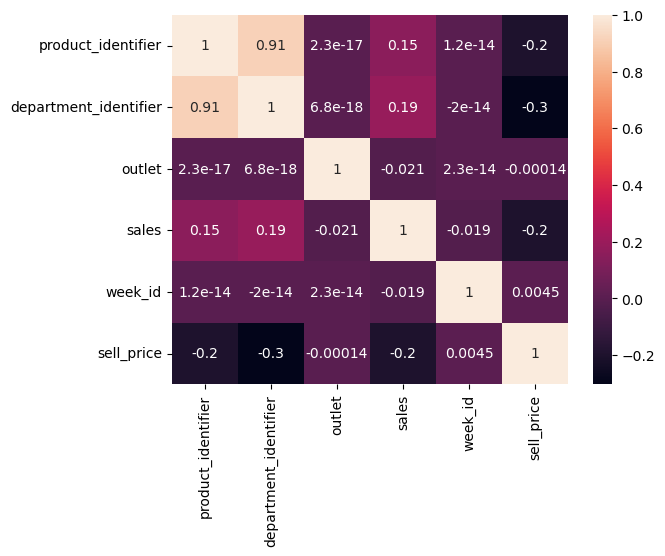

In [79]:
sns.heatmap(train_dataset.corr(),annot=True)

product_identifier         AxesSubplot(0.125,0.847647;0.0260067x0.0323529)
department_identifier    AxesSubplot(0.156208,0.847647;0.0260067x0.0323...
outlet                   AxesSubplot(0.187416,0.847647;0.0260067x0.0323...
sales                    AxesSubplot(0.218624,0.847647;0.0260067x0.0323...
week_id                  AxesSubplot(0.249832,0.847647;0.0260067x0.0323...
sell_price               AxesSubplot(0.28104,0.847647;0.0260067x0.0323529)
dtype: object

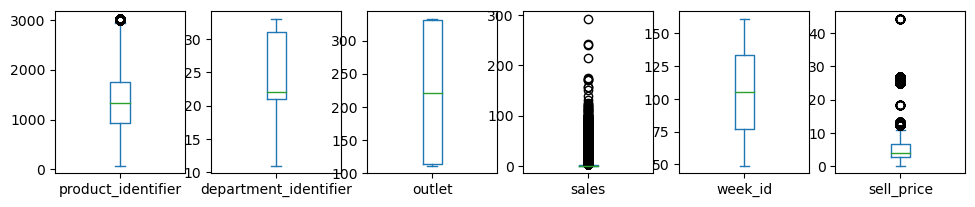

In [80]:
(train_dataset.plot(kind="box", subplots=True, layout=(20,25),figsize=(50,50)))